In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("./data/spam.csv",encoding='latin1')

In [3]:
data_copy = data.copy()

In [4]:
data.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
543,ham,4 oclock at mine. Just to bash out a flat plan.,NaN,NaN,NaN
1479,ham,My trip was ok but quite tiring lor. Uni start...,NaN,NaN,NaN
4109,ham,"Yo, you gonna still be in stock tomorrow/today...",NaN,NaN,NaN
4584,spam,U have a Secret Admirer who is looking 2 make ...,NaN,NaN,NaN
2965,ham,"Are you being good, baby? :)",NaN,NaN,NaN


In [5]:
data.shape

(5572, 5)

In [6]:
 data.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [7]:
data.duplicated().sum()

np.int64(403)

In [8]:
data.drop_duplicates(inplace=True)

In [9]:
data.duplicated().sum()

np.int64(0)

In [10]:
new_df = data[['v1','v2']].copy()

In [11]:
new_df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
new_df.iloc[2].v2

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [13]:
new_df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [14]:
new_df.sample(5)

,target,text
5299,ham,Well good morning mr . Hows london treatin' ya...
3138,ham,Is ur lecture over?
1285,ham,"Just wondering, the others just took off"
266,ham,"Not sure yet, still trying to get a hold of him"
3430,ham,Yeah if we do have to get a random dude we nee...


In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
encoder = LabelEncoder()

In [17]:
new_df['target'] = encoder.fit_transform(new_df['target'])

In [18]:
new_df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
new_df.duplicated().sum()

np.int64(0)

In [20]:
new_df.isna().sum()

target    0
text      0
dtype: int64

<h1>EDA</h1

In [21]:
import matplotlib.pyplot as plt

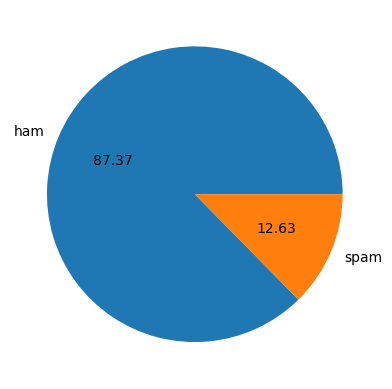

In [22]:
plt.pie(new_df['target'].value_counts() , labels=['ham','spam'],autopct = '%0.2f')
plt.show()

In [23]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
new_df['num_characters'] = new_df['text'].apply(len)

In [25]:
new_df.sample()

,target,text,num_characters
803,1,You have won a guaranteed å£200 award or even ...,143


In [26]:
new_df['num_words'] = new_df['text'].apply(lambda x : len(nltk.word_tokenize(x)))

In [27]:
new_df['num_sentences'] = new_df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [28]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

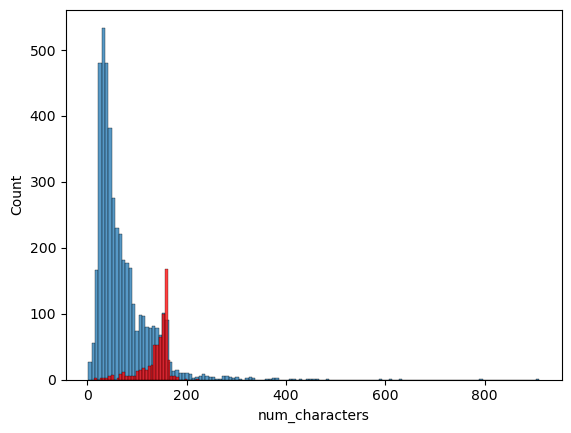

In [29]:
sns.histplot(new_df[new_df['target'] == 0]['num_characters'])
sns.histplot(new_df[new_df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

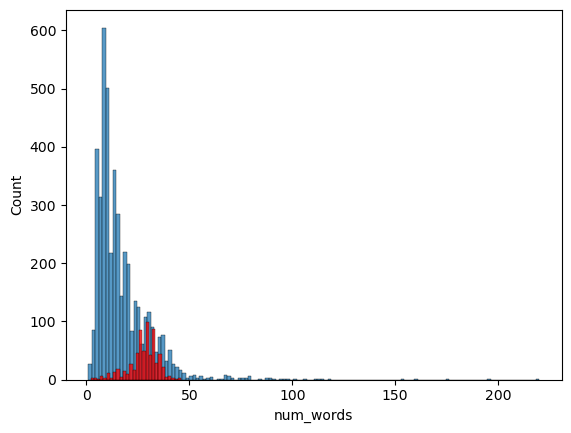

In [30]:
sns.histplot(new_df[new_df['target'] == 0]['num_words'])
sns.histplot(new_df[new_df['target'] == 1]['num_words'],color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

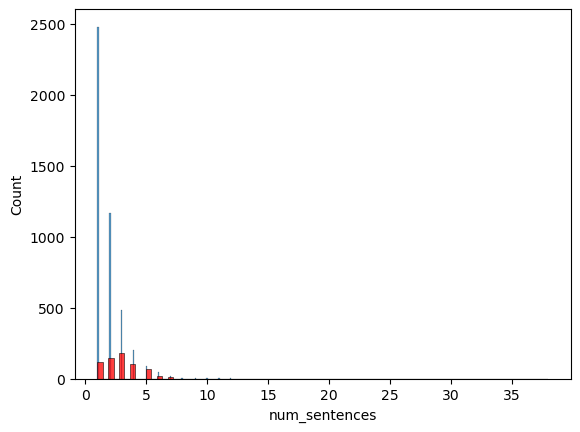

In [31]:
sns.histplot(new_df[new_df['target'] == 0]['num_sentences'])
sns.histplot(new_df[new_df['target'] == 1]['num_sentences'],color='red')

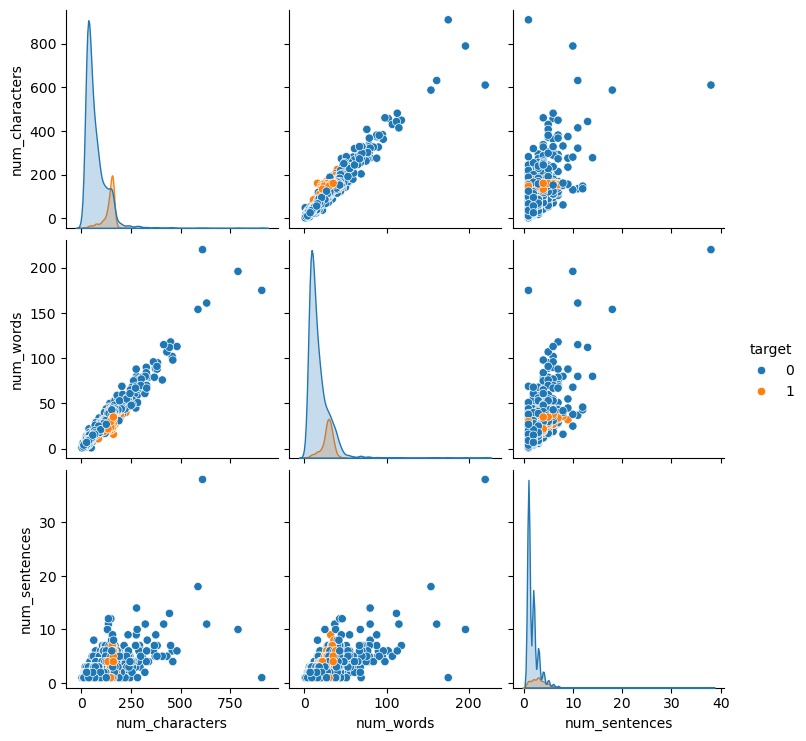

In [32]:
sns.pairplot(new_df,hue='target')

<Axes: >

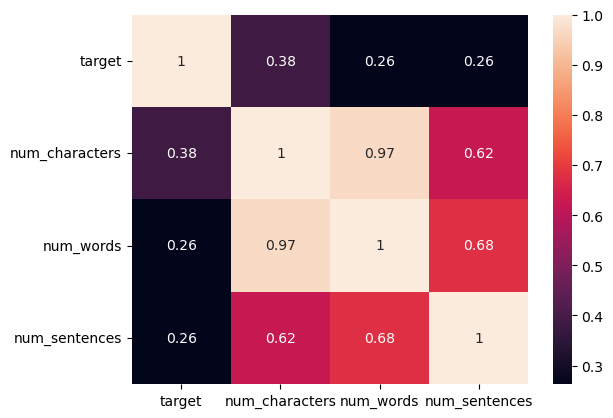

In [33]:
numeric_df = new_df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_df.corr(), annot=True)


In [34]:
from nltk.corpus import stopwords
import string 
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [35]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    l = []
    for i in text:
        if i.isalnum():
            l.append(i)
    text = l.copy()
    l.clear()
    for i in text :
        if i not in stopwords.words('english') and i not in string.punctuation:
            l.append(ps.stem(i))
    return " ".join(l)
            
    

In [36]:
transform_text('I loved the YT lectures on Machine Learning?')

'love yt lectur machin learn'

In [37]:
new_df['text'] = new_df['text'].apply(transform_text)

In [38]:
new_df['text'].sample(5)

641     said kiss kiss ca sound effect gorgeou man kin...
1093    well weather cali great complex great need car...
2854    gon na death gon na leav note say rob fault aveng
43                                                    see
3945    u doin babi girl hope u okay everi time call u...
Name: text, dtype: object

In [39]:
new_df['text'][2745]

'r go 4 today meet'

In [40]:
!pip install wordcloud

In [41]:
from wordcloud import WordCloud
wc = WordCloud(background_color='white')

In [42]:
spam_wc = wc.generate(new_df[new_df['target'] == 1]['text'].str.cat(sep=' '))

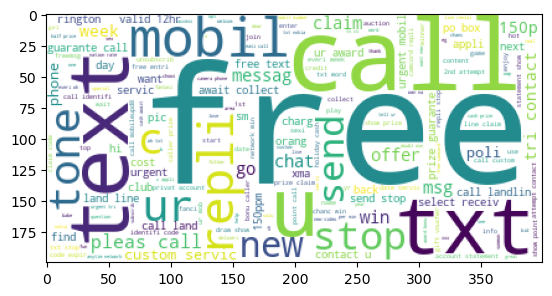

In [43]:
plt.imshow(spam_wc)

In [44]:
ham_wc = wc.generate(new_df[new_df['target'] == 0]['text'].str.cat(sep=' '))

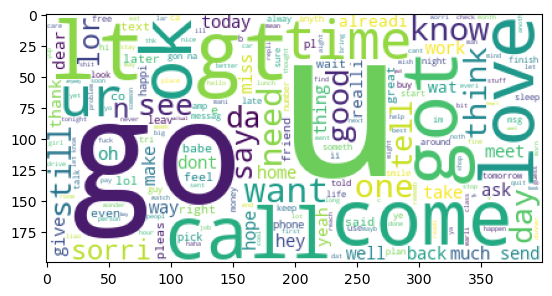

In [45]:
plt.imshow(ham_wc)

In [46]:
spam_corpas = []

for msg in new_df[new_df['target']==1]['text'].tolist():
    for word in msg.split():
        spam_corpas.append(word)

In [47]:
len(spam_corpas)

9939

In [48]:
from collections import Counter

In [49]:
pd.DataFrame(Counter(spam_corpas).most_common(10))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


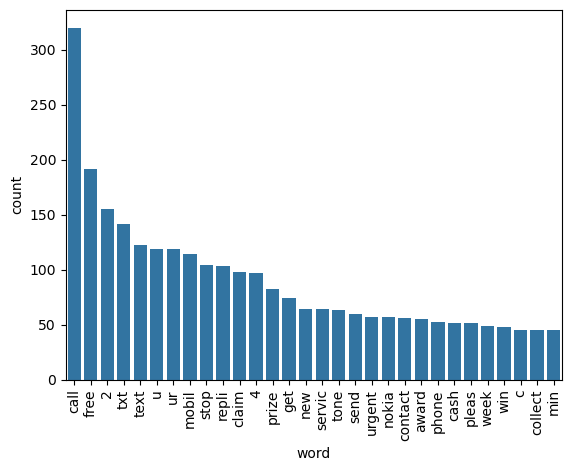

In [50]:
most_common_df = pd.DataFrame(Counter(spam_corpas).most_common(30), columns=['word', 'count'])
sns.barplot(x='word', y='count', data=most_common_df)
plt.xticks(rotation='vertical')
plt.show()

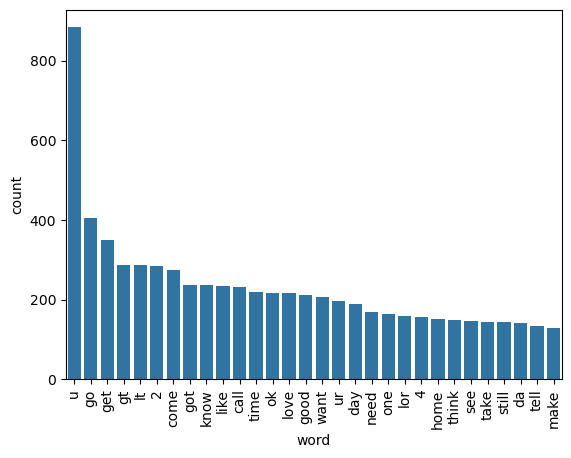

In [51]:
ham_corpas = []

for msg in new_df[new_df['target']==0]['text'].tolist():
    for word in msg.split():
        ham_corpas.append(word)

most_common_ham_word = pd.DataFrame(Counter(ham_corpas).most_common(30), columns=['word', 'count'])
sns.barplot(x='word', y='count', data=most_common_ham_word)
plt.xticks(rotation='vertical')
plt.show()

<h1>Model building<h1>

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer()